# Tugas Asynchronous: Melakukan Analisis Data Eksploratif

**Analisis Data Eksploratif: House Price**
Tujuan tugas adalah untuk melakukan EDA pada dataset House Price. Data memiliki 79 explanatory variables yang mendeskripsikan hampir dari semua aspek dari rumah di daerah Ames, Iowa.

**Cek Data**
1. Load data ke pandas
2. Cek apakah ada data yang memiliki data kosong/NaN, hitung berapa % data kosong
3. Identifikasi kolom yang bersifat numerik dan non numerik
4. Buat dan intepretasikan ringkasan statistik deskriptif

**Univariate**

Cek Categorical Variables
1. Buat barplot pada **MSZoning, Street, dan LotShape**
2. Jelaskan bagaimana data terdistribusi dan informasi lain yang anda dapatkan dari plot yang telah dibuat

Cek Numerical Variables
1. Buat histogram pada **SalePrice, LotArea, 2ndFlrSF**
2. Jelaskan bagaimana data terdistribusi dan informasi lain yang anda dapatkan dari plot yang telah dibuat

**Multivariate**
1. Buatlah matriks korelasi dari variabel yang bersifat numerik

**Bivariate**
1. Buat scatterplot variabel 1stFlrSF vs SalePrice, berikan penjelasan tentang hasil yang anda dapatkan (scatterplot cukup berguna untuk menganalisis 2 variabel numerik)  
2. Buat boxplot variabel FullBath dengan SalePrice, , berikan penjelasan tentang hasil yang anda dapatkan (boxplot cukup berguna untuk menganalisis data ordinal/kategorikal)

In [1]:
#import pandas
import pandas as pd

#1. Cek Data

##1.1 Load Data ke Pandas

In [2]:
house = pd.read_csv("https://raw.githubusercontent.com/audit-ti/pjj-pengolahan-data-python/main/02.%20Data%20and%20Business%20Understanding/tugas/houseprice_train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##1.2 Persentase Data Kosong

In [60]:
missing_value_counter = (100*house.isnull().sum()/house.isnull().count()).reset_index(-1)
missing_value_counter.rename(columns={'index':'col_name',0:'null_percentage'}, inplace=True)
columns_with_missing_value = missing_value_counter[missing_value_counter['null_percentage']>0].reset_index()
columns_with_missing_value = columns_with_missing_value.sort_values('null_percentage', ascending=False).reset_index()[['col_name','null_percentage']]
columns_with_missing_value.style.background_gradient(cmap='summer')

,col_name,null_percentage
0,PoolQC,99.520548
1,MiscFeature,96.301370
2,Alley,93.767123
3,Fence,80.753425
4,FireplaceQu,47.260274
5,LotFrontage,17.739726
6,GarageType,5.547945
7,GarageYrBlt,5.547945
8,GarageFinish,5.547945
9,GarageQual,5.547945


##1.3 Tipe Data

In [70]:
data_type = pd.DataFrame(house.dtypes, columns=['data_type'])
data_type_char = data_type[data_type['data_type']=='object'].index.tolist()
data_type_number = data_type[data_type['data_type']!='object'].index.tolist()
print('Tipe data teks: ')
print(data_type_char)
print('Tipe data nomor: ')
print(data_type_number)

Tipe data teks: 
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Tipe data nomor: 
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageAr

##1.4 Statistik Deskriptif

In [62]:
descriptive_stat = house.describe().T.reset_index(-1)
#descriptive_stat = descriptive_stat.drop(index = 0, inplace=True)
descriptive_stat

,index,count,mean,std,min,25%,50%,75%,max
0,Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
1,MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
2,LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
3,LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
4,OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
5,OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
6,YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
7,YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
8,MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
9,BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#2. Univariate Analysis

##2.1 Buat barplot pada MSZoning, Street, dan LotShape

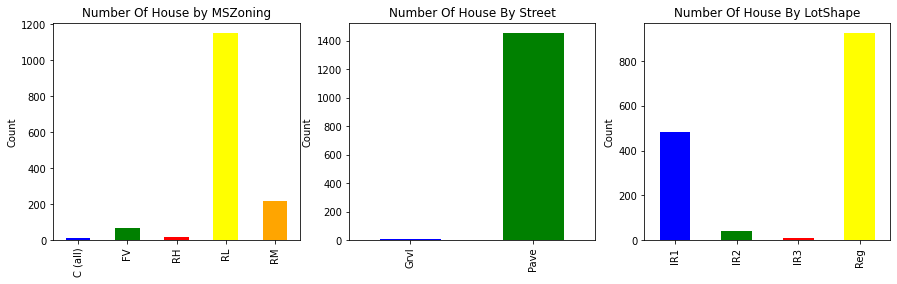

In [31]:
# Kolom MSZoning, Street, dan LotShape

from matplotlib import pyplot as plt
import seaborn as sns

f,ax=plt.subplots(1,3,figsize=(15,4))

# subplot 1 
house['MSZoning'].value_counts().sort_index().plot.bar(color=['blue','green','red','yellow','orange'],
                                                       ax=ax[0])
ax[0].set_title('Number Of House by MSZoning')
ax[0].set_ylabel('Count')

# subplot 1
house['Street'].value_counts().sort_index().plot.bar(color=['blue','green'],
                                                    ax=ax[1])
ax[1].set_title('Number Of House By Street')
ax[1].set_ylabel('Count')


# subplot 2 
house['LotShape'].value_counts().sort_index().plot.bar(color=['blue','green','red','yellow'],
                                                       ax=ax[2])
ax[2].set_title('Number Of House By LotShape')
ax[2].set_ylabel('Count')

# show
plt.show()

##2.2 Buat histogram pada SalePrice, LotArea, 2ndFlrSF

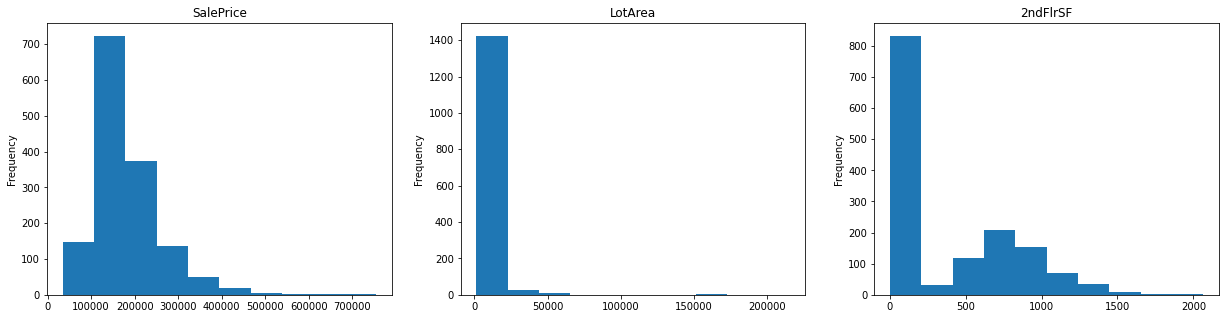

In [72]:
# Kolom SalePrice, LotArea, 2ndFlrSF

f,ax=plt.subplots(figsize=(21,11))

plt.subplot(2,3,1)
house.SalePrice.plot.hist()
plt.title('SalePrice')

plt.subplot(2,3,2)
house.LotArea.plot.hist()
plt.title('LotArea')

plt.subplot(2,3,3)
house['2ndFlrSF'].plot.hist()
plt.title('2ndFlrSF')

plt.show()

#3. Multivariate Analysis

In [41]:
korelasi = house.corr().reset_index()
korelasi.style.background_gradient(cmap='summer')

,index,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
1,MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
2,LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
3,LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
4,OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
5,OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
6,YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
7,YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
8,MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
9,BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0

#4. Analisis Bivariate

##4.1 Buat scatterplot variabel 1stFlrSF vs SalePrice

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


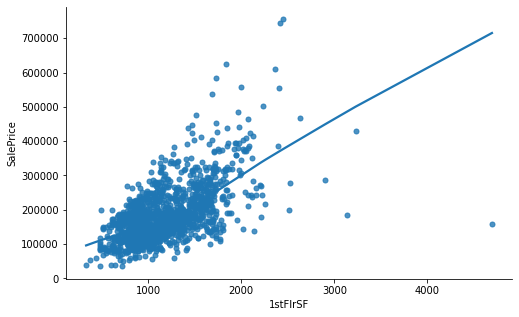

In [48]:
# 1stFlrSF vs SalePrice
fig, ax = plt.subplots(figsize=(8,5))
sns.regplot(x=house['1stFlrSF'], y=house['SalePrice'],  scatter_kws = {'s': 25}, lowess=True)
sns.despine()

##4.2 Buat boxplot variabel FullBath dengan SalePrice,

Text(0.5, 1.0, 'SalePrice')

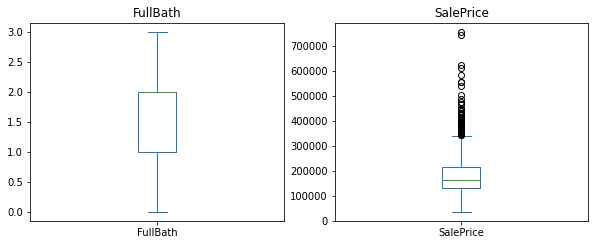

In [49]:
#FullBath dengan SalePrice,
f,ax=plt.subplots(figsize=(10,8))

plt.subplot(2,2,1)
house['FullBath'].plot.box()
plt.title('FullBath')

plt.subplot(2,2,2)
house['SalePrice'].plot.box()
plt.title('SalePrice')